<a href="https://colab.research.google.com/github/GECarlo/CodingDojo/blob/main/KNN_Challenge_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display = 'diagram')

# ML model
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# import file
data = '/content/drive/MyDrive/Colab Notebooks/abalone.data'
df = pd.read_csv(data)
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
# add column names from file
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings']
df.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


7. Attribute information:

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)

	Length		continuous	mm	Longest shell measurement

	Diameter	continuous	mm	perpendicular to length

	Height		continuous	mm	with meat in shell

	Whole weight	continuous	grams	whole abalone

	Shucked weight	continuous	grams	weight of meat

	Viscera weight	continuous	grams	gut weight (after bleeding)

	Shell weight	continuous	grams	after being dried
  
	Rings		integer			+1.5 gives the age in years

In [5]:
# check shape
df.shape

(4176, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       4176 non-null   object 
 1   Length    4176 non-null   float64
 2   Diameter  4176 non-null   float64
 3   Height    4176 non-null   float64
 4   Whole     4176 non-null   float64
 5   Shucked   4176 non-null   float64
 6   Viscera   4176 non-null   float64
 7   Shell     4176 non-null   float64
 8   Rings     4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
# check for missing values
df.isna().sum().sum()

0

In [8]:
# check for duplicates
df.duplicated().sum().sum()

0

In [9]:
# check for outliers
df.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


1) Separate your data into the features matrix (X) and target vector (y).

2) Create a train, test, split on the data. Please use random number 42 for consistency.

3) Use column transformers to transform the appropriate columns

In [11]:
# Separate your data into the features matrix (X) and target vector (y) Rings
# target y
y = df['Sex']

# features X
X = df.drop(columns = ['Sex'])
X.head()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [12]:
# Create a train, test, split on the data. Please use random number 42 for consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

**For the column transformations:**

    a) Use column selectors to select the categorical columns and the numerical columns

    b) Use a OneHotEncoder to encode the categorical columns

    c) Use a StandardScaler to scale the numeric columns

    d) Use a ColumnTransformer to match the transformation to the type of column

    e) Transform the data and display the resulting Numpy array.

In [13]:
# Use column transformers to transform the appropriate columns
# use pipeline and column transformer
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [14]:
# Use a OneHotEncoder to encode the categorical columns
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

# scale numeric columns
scaler = StandardScaler()

In [15]:
# Use a StandardScaler to scale the numeric columns
# create tuple
cat_tuple = (ohe, cat_selector)
num_tuple = (scaler, num_selector)

In [16]:
# Use a ColumnTransformer to match the transformation to the type of column
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder = 'drop')

In [17]:
# Transform the data and display the resulting Numpy array.
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4b9fa5a10>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4b9fa5690>)])

In [18]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Machine Learning Model KNN

In [22]:
# instantitate the model
knn = KNeighborsClassifier()

# fit the model
knn.fit(X_train_processed, y_train)

# create prediction
trained_class_score = knn.score(X_train_processed, y_train)
print(f'train score {trained_class_score}')

tested_class_score = knn.score(X_test_processed, y_test)
print(f'test score {tested_class_score}')

train score 0.6663473818646233
test score 0.5268199233716475


In [25]:
train_pred = knn.predict(X_train_processed)
test_pred = knn.predict(X_test_processed)

print('training scores')
print(classification_report(y_train, train_pred))

print('testing scores')
print(classification_report(y_test, test_pred));

training scores
              precision    recall  f1-score   support

           0       0.70      0.85      0.77      1009
           1       0.61      0.62      0.62       995
           2       0.67      0.55      0.60      1128

    accuracy                           0.67      3132
   macro avg       0.66      0.67      0.66      3132
weighted avg       0.66      0.67      0.66      3132

testing scores
              precision    recall  f1-score   support

           0       0.64      0.78      0.70       333
           1       0.41      0.44      0.43       312
           2       0.50      0.38      0.43       399

    accuracy                           0.53      1044
   macro avg       0.52      0.53      0.52      1044
weighted avg       0.52      0.53      0.52      1044



In [26]:
# get hyperparameters 
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [27]:
# using n_estimators as hyperparameter for model tuning
# create list of values
knn_range = list(range(1, 5))

# create list to store scores for each max_depth value
r2 = []

# create loop to test all ranges from max_depth_range
for neighbors in knn_range:
  knn = KNeighborsClassifier(n_neighbors = neighbors,)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  r2.append(score)

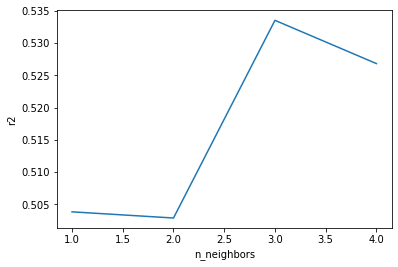

In [30]:
# visualize the results
plt.plot(knn_range, r2)
plt.xlabel('n_neighbors')
plt.ylabel('r2');

In [32]:
# instantitate the model
knn = KNeighborsClassifier(n_neighbors = 3)

# fit the model
knn.fit(X_train_processed, y_train)

# create prediction
trained_class_score = knn.score(X_train_processed, y_train)
print(f'train score {trained_class_score}')

tested_class_score = knn.score(X_test_processed, y_test)
print(f'test score {tested_class_score}')

train score 0.723499361430396
test score 0.5076628352490421


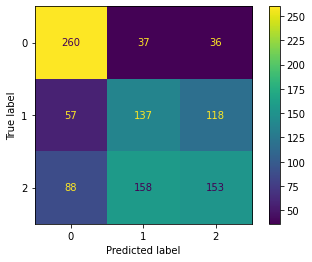

In [33]:
# create confusion matrics
ConfusionMatrixDisplay.from_predictions(y_test, test_pred);